project objectives:
1. perform basic data preprocessing in python
2. model a classification task using scikit learn python apis
3. train a SVM machine and Decision tree models using scikit learn
4. assess the quality of the models

dataset obtained from Kaggle:
#credit card fraud detection dataset from Kaggle:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [4]:
#importing the necessary modules for this classification

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [6]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
raw_data=pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
labels = raw_data.Class.unique()
sizes = raw_data.Class.value_counts().values

<Axes: >

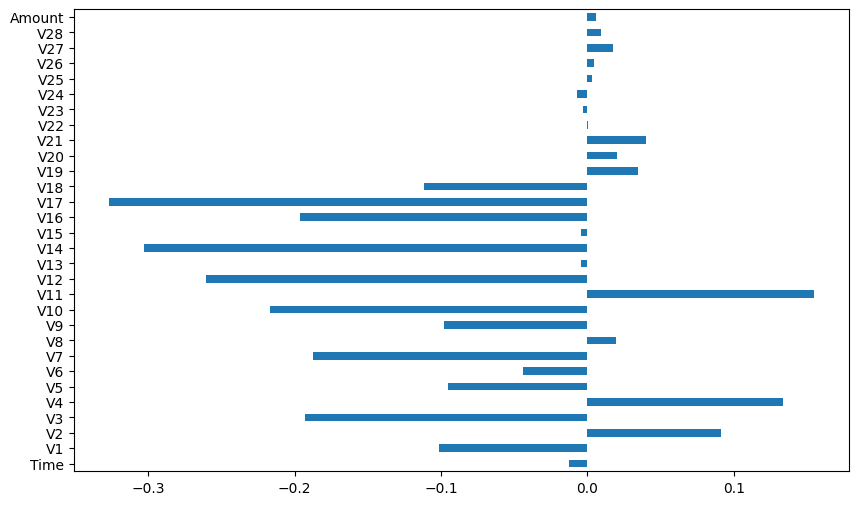

In [8]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10,6))

In [9]:
from sklearn.preprocessing import StandardScaler
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values
X = data_matrix[:,1:30]
y = data_matrix[:,30]
X = normalize(X, norm ="l1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
#building the decision tree model
w_train = compute_sample_weight('balanced', y_train)
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train,y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [10]:
#building the support vector machine model
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [19]:
#measuring the precision score by calculating the area under reciever-operator characteristic curve(ROC-AUC)
from sklearn.metrics import roc_auc_score 
y_pred_dt = dt.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree ROC-AUC score : {0:.3f}".format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


In [21]:
#evaluating the support vector machine models
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))


SVM ROC-AUC score: 0.986


In [23]:
#to plot the SVM, we need to reduce the no of features(dimensionality) to 2, because in higher order, it is hard to plot

In [52]:
#so we are taking the most affecting 2 factors from our correlational matrix and train the model with it.
import warnings
warnings.filterwarnings('ignore')
g2f = correlation_values.abs().sort_values(ascending=False).head(2)
top_columns = g2f.index.tolist()
raw_data_1 = raw_data[top_columns]
print(raw_data_1.shape)
y_1 = raw_data.iloc[:,30]
X_1 = StandardScaler().fit_transform(raw_data_1)
X_1 = normalize(X_1, norm ="l1")
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, test_size = 0.3, random_state=42)
from sklearn.svm import SVC
model_1 = SVC(kernel='linear')
model_1.fit(X_train_1,y_train_1)
y_pred_1 = model_1.predict(X_test_1)
roc_auc_svm_1 = roc_auc_score(y_test_1, y_pred_1)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm_1))


 

(284807, 2)
SVM ROC-AUC score: 0.500


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

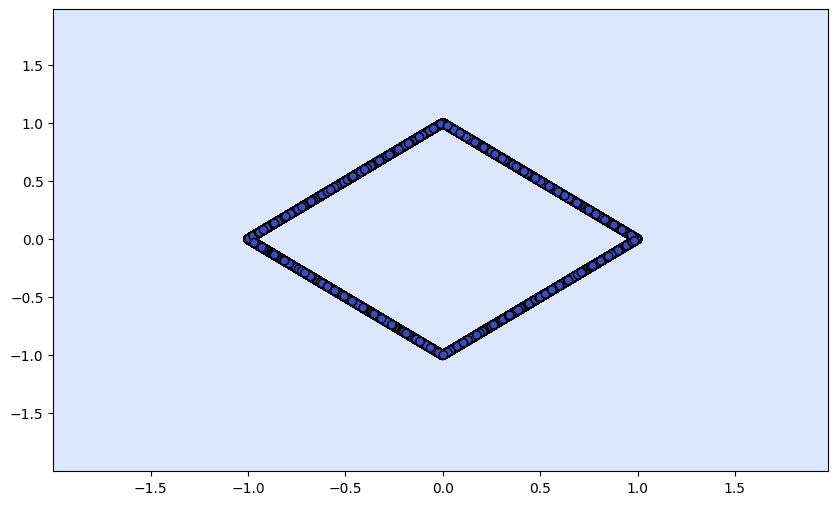

In [56]:
#plotting the 2-dimensional feature bounded SVM model
import numpy as np
h = 0.02
x_min, x_max = X_train_1[:, 0].min() - 1, X_train_1[:, 0].max() + 1
y_min, y_max = X_train_1[:, 1].min() - 1, X_train_1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Predict on the meshgrid
Z = model_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision surface and training data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(X_train_1[0])
plt.ylabel(X_train_1[1])
plt.title('SVM Decision Boundary (Train Data)')
plt.show()